In [ ]:
#Load libraries
library(tidyverse)
library(dplyr)
library(IRdisplay)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
#Read Dataset
Superdry_Data <- read.csv(file= 'SuperDry2.csv')

#Renaming and selecting Imp Columns 

Superdry_Data2 <- Superdry_Data %>% select(Age = Q1, Gender = Q2,
                      Connection = Q3, ProductHappy = Q4, RetailHappy = Q5,
                      Luxury = Q6, Recommend = Q7, Detailing= Q8, Loyal=Q9, Value=Q10)

head(Superdry_Data2,10)


,Age,Gender,Connection,ProductHappy,RetailHappy,Luxury,Recommend,Detailing,Loyal,Value
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,What is your Age?,What is your Gender?,How much of a personal connection do you feel for the brand SuperDry?,How happy are you with SuperDry Products?,How happy are you with SuperDry's retail Experience?,Do you associate SuperDry as a Symbol of luxury?,How likely are you to recommend SuperDry to your Friends & Family?,Does the Unique detailing on SuperDry clothes matter to you?,Do you consider yourself loyal to SuperDry?,Do you think the clothing collection offered by SuperDry is a good value for money?
2,"{""ImportId"":""QID1""}","{""ImportId"":""QID2""}","{""ImportId"":""QID15""}","{""ImportId"":""QID5""}","{""ImportId"":""QID6""}","{""ImportId"":""QID7""}","{""ImportId"":""QID8""}","{""ImportId"":""QID9""}","{""ImportId"":""QID10""}","{""ImportId"":""QID12""}"
3,,,,,,,,,,
4,1,1,4,4,4,4,8,2,5,5
5,1,1,5,4,5,5,10,3,8,3
6,2,1,3,4,4,4,7,4,7,4
7,2,1,4,5,4,4,8,5,5,3
8,1,1,4,3,4,3,8,3,7,4
9,1,2,5,1,5,5,10,5,9,4


In [ ]:
#Omit 1st Index
Superdry_Data2 <- Superdry_Data2[-c(1,),]

In [ ]:
#Convert to Numeric
Superdry_Data2 <- as.data.frame(sapply(Superdry_Data2, as.numeric))

#Clean dataset
Superdry_Data2  <- na.omit(Superdry_Data2)

#View Cleaned Dataset
head(Superdry_Data2 ,10)

#Check sum of null values
sum(!complete.cases(Superdry_Data2))

#Attach 
attach(Superdry_Data2)

#Change Metric to Two Factor

Trust <- as.factor(Gender)

,Age,Gender,Connection,ProductHappy,RetailHappy,Luxury,Recommend,Detailing,Loyal,Value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,4,4,4,4,8,2,5,5
2,1,1,5,4,5,5,10,3,8,3
3,2,1,3,4,4,4,7,4,7,4
4,2,1,4,5,4,4,8,5,5,3
5,1,1,4,3,4,3,8,3,7,4
6,1,2,5,1,5,5,10,5,9,4
7,2,1,5,4,4,5,8,4,1,4
8,2,1,4,5,5,5,8,5,3,4
9,1,1,3,4,3,4,7,3,5,4


[1] 0

The following objects are masked from Superdry_Data2 (pos = 3):

    Age, Connection, Detailing, Gender, Loyal, Luxury, ProductHappy,
    Recommend, RetailHappy, Value




In [ ]:
#Summary of Whole Dataset
summary(Superdry_Data2)

      Age            Gender        Connection     ProductHappy  
 Min.   :1.000   Min.   :1.000   Min.   :3.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:4.000   1st Qu.:4.000  
 Median :2.000   Median :1.000   Median :4.000   Median :4.000  
 Mean   :1.556   Mean   :1.333   Mean   :4.148   Mean   :4.037  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:5.000   3rd Qu.:5.000  
 Max.   :2.000   Max.   :3.000   Max.   :5.000   Max.   :5.000  
  RetailHappy        Luxury        Recommend        Detailing    
 Min.   :3.000   Min.   :3.000   Min.   : 6.000   Min.   :2.000  
 1st Qu.:4.000   1st Qu.:4.000   1st Qu.: 8.000   1st Qu.:3.000  
 Median :4.000   Median :4.000   Median : 8.000   Median :4.000  
 Mean   :4.296   Mean   :4.407   Mean   : 8.259   Mean   :3.778  
 3rd Qu.:5.000   3rd Qu.:5.000   3rd Qu.: 9.000   3rd Qu.:4.500  
 Max.   :5.000   Max.   :5.000   Max.   :10.000   Max.   :5.000  
     Loyal            Value      
 Min.   : 0.000   Min.   :2.000  
 1st Qu.: 3.000

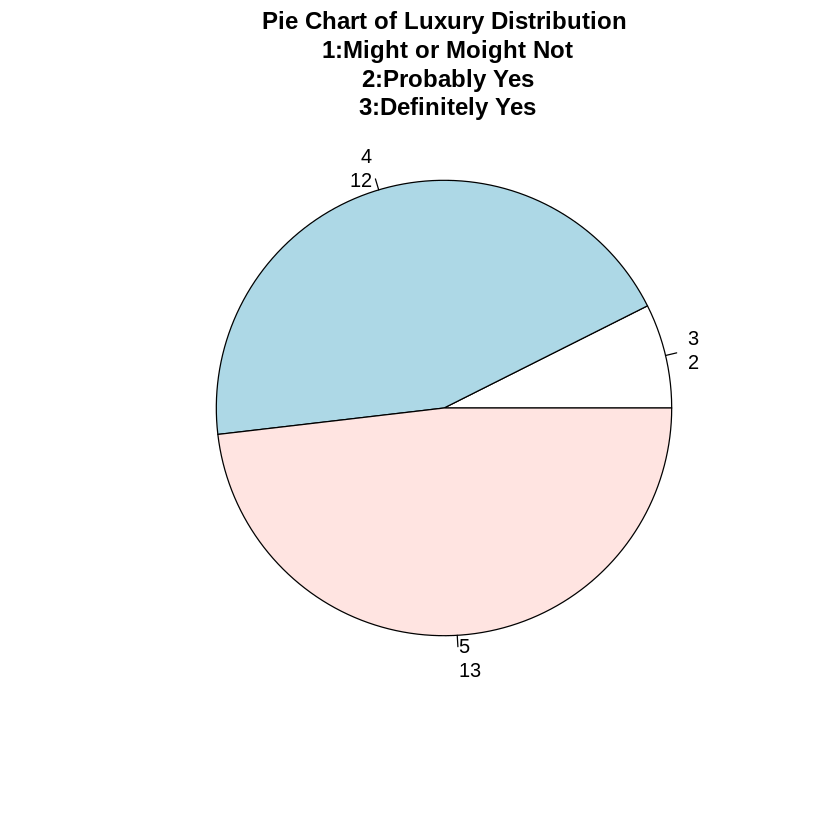

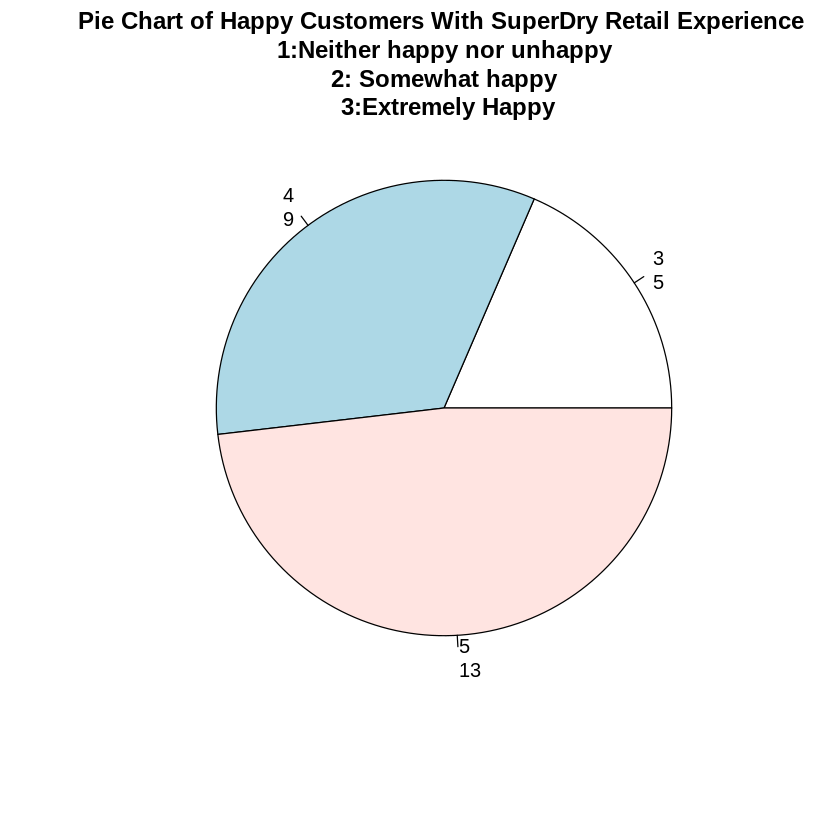

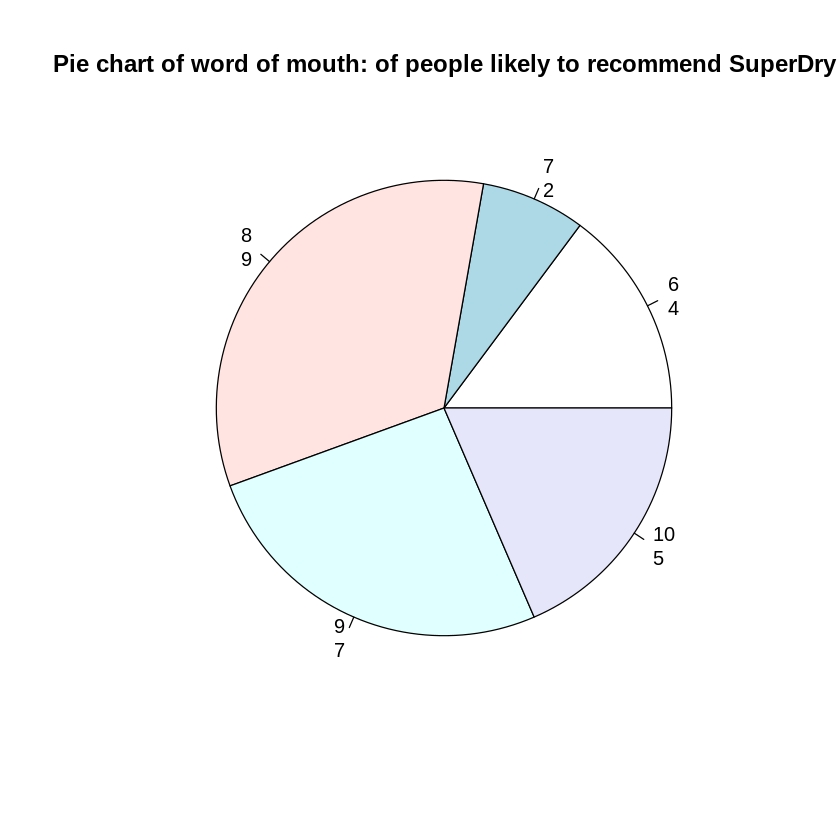

In [ ]:
# Pie Chart distribution for Luxury

pieDF <- table(Luxury)
legend <- paste(names(pieDF), "\n", pieDF, sep="")
pie(pieDF, labels = legend,
   main="\n Pie Chart of Luxury Distribution \n 1:Might or Moight Not\n 2:Probably Yes\n 3:Definitely Yes") 

# Pie Chart distribution for Retail Happy

pieDF <- table(RetailHappy)
legend <- paste(names(pieDF), "\n", pieDF, sep="")
pie(pieDF, labels = legend,
   main=" \nPie Chart of Happy Customers With SuperDry Retail Experience \n 1:Neither happy nor unhappy \n 2: Somewhat happy \n 3:Extremely Happy") 

  # Pie  Chart distribution for Word of Mouth

pieDF <- table(Recommend)
legend <- paste(names(pieDF), "\n", pieDF, sep="")
pie(pieDF, labels = legend,
   main=" \nPie chart of word of mouth: of people likely to recommend SuperDry") 

In [ ]:
#Brand Experience & Brand Identification: Co-Relation Test

Corr1 <- cor.test(Connection, RetailHappy)

Corr1


	Pearson's product-moment correlation

data:  Connection and RetailHappy
t = 4.0827, df = 25, p-value = 0.0004005
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3323375 0.8162931
sample estimates:
      cor 
0.6324744 


In [ ]:
#Brand Prestige & Brand Identification: Co-Relation Test

Corr2 <- cor.test(Connection, Luxury)

Corr2


	Pearson's product-moment correlation

data:  Connection and Luxury
t = 3.5503, df = 25, p-value = 0.001556
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2550608 0.7860349
sample estimates:
      cor 
0.5789582 


In [ ]:
#Word of Mouth & Brand Identification: Co-Relation Test

Corr3 <- cor.test(Connection, Recommend)

Corr3


	Pearson's product-moment correlation

data:  Connection and Recommend
t = 6.9733, df = 25, p-value = 2.612e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6259936 0.9112683
sample estimates:
      cor 
0.8126817 
